# Згорткові нейромережі.
У глибокому навчанні, <a href="https://en.wikipedia.org/wiki/Convolutional_neural_network">згорткові нейронні мережі</a> це клас штучних нейронних мереж, які найчастіше застосовуються для аналізу візуальних даних.

Чорно білі зображення у комп'ютерах представлені як двовимірні масиви, кожен елемент якого має значення від 0 до 1:

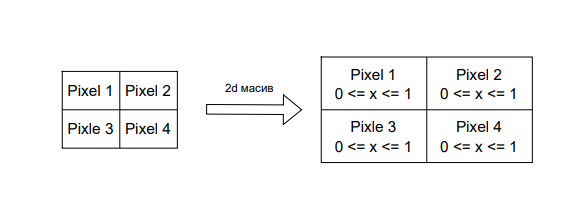

Кольорові зображення у свою чергу представлені як трьохвимірний масив, кожен елемент якого містить у собі вектор трьох значень, які представляють колір:

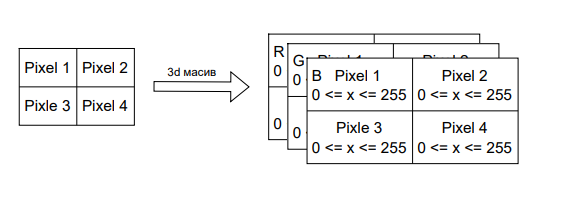

Через те, що інформація у такому забраженні зберігається не у одному вимірі, застосовувати прості нейронні мережі є проблематично.
Згорткові нейронні мережі, використовуючи операцію згортки, дозволяють зменшити вимірність зображення, але без втрат інформації при цьому.

##  Операція згортки.
<a href="https://en.wikipedia.org/wiki/Convolution">Згортка</a> - це інтеграл добутку двох функцій _g_ та _f_:

$
(f * g)(t) = \int\limits_{-\infty}^{\infty}f(\tau)g(t-\tau)d\tau
$

Тут $\tau$ це не змінна, яка показує час. У цьому випадку, для кожного _t_, формула згортки може бути описана як площа під функцією $f(\tau)$ зваженою функцією $g(-\tau)$ зсунуту на _t_. Зі зміною _t_ функція $g(t-\tau)$ наголошує на різних частинах вхідної функції $f(\tau)$.

Нехай ми маєм чорно біле зображення:

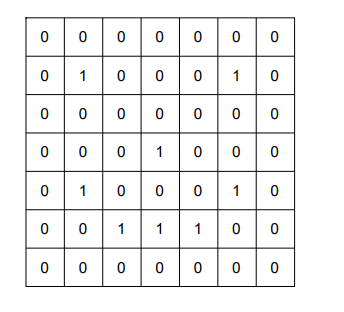

Для того, щоб отримувати інформацію з зображення використовуються так звані детектори ознак (feature detector). Це матриці певного розміру (3х3, 5х5, 7х7 тощо) які також називаються ядром (kernel) або фільтром. Виконується операція згортки над цим зображенням та фільтром та на виході отримується мапа ознак:

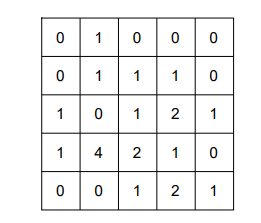

Як працює сама згортка: фільтр співставляється з пікселями зображення (на прикладі виділено зеленим) і виконується логічне множення кожного елемента фільтра з відповідним елементом зображення, і потім всі отриманні значення додаються:

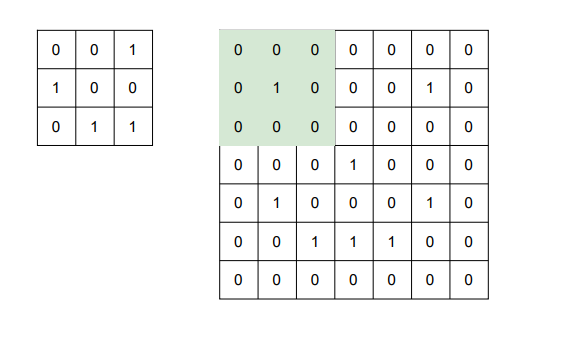

У цей момент отриманий результат є нулем, що записується у мапу ознак. Фільтр зсувається на одиницю вправо і процес повторюється:

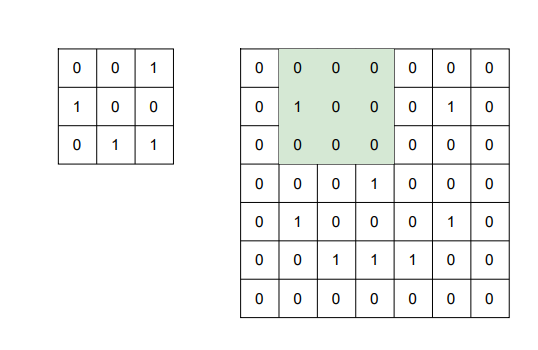

У цьому випадку результатом буде одиниця, що і записується у мапу ознак. Для наглядності, продемонстровано ще три кроки цього процесу:

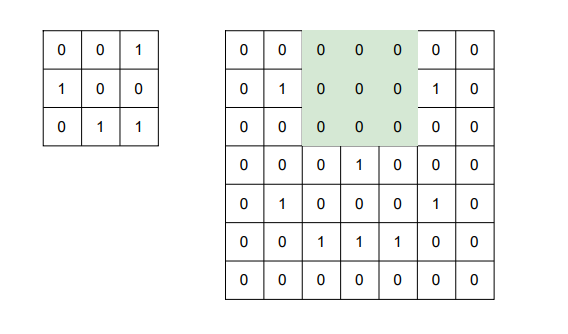

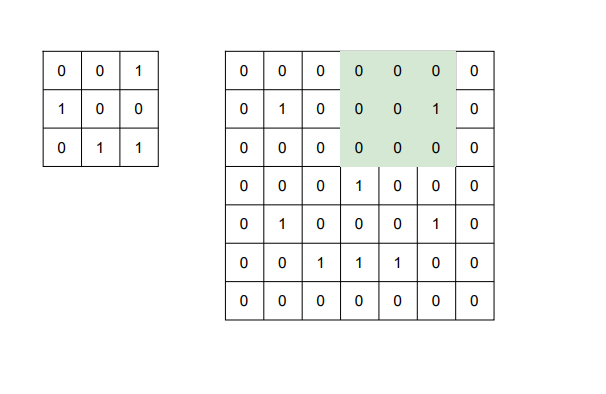

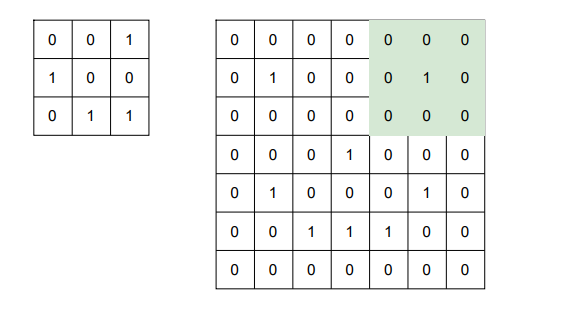

Те, яким чином рухається фільтр по зображенні називається `stride`.
Після завершення операції згортки зменшується розмір зображення у залежності від параметру `stride`. Чим цей параметр більше, тим сильніше стискається зоюраження. Це дозволяє алгоритмам обробляти зображення швидше. Але разом з тим відбувається втрата певної інформації.
<br> Детектор ознак має у собі певний шаблон, отже найбільше число у мапі ознак буде там, де зображення найточніше відповідає детектору ознак.
У подальшому створюється багато мап ознак, які стають згортковим шаром нейромережі. Мережа вчиться на них, щоб розуміти, які ознаки є важливими, а які можна ігнорувати.
<br> Ще одним застосуванням операції згоркти є фільтрація зображень.

## ReLU Шар.
До згорткового шару застосовується функція активації `Rectifier`. Це робиться для збільшення нелінійності у мережі. Зображення є нелінійнимим самі по собі, але при використанні згортки з'являється ризик утворення лінійності.

## Max Polling.
На мапу ознак накладається фільтр певного розміру. У нашому випадку це буде 2х2. Серед елементів зображення, які попадають у матрицю, обирається максимальний елемент і записується у вихідну матрицю.

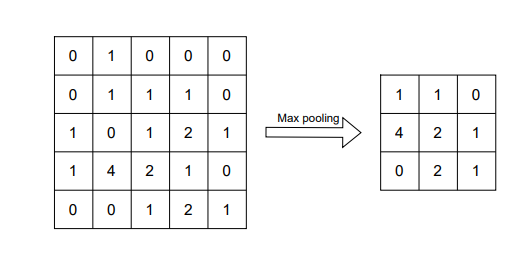

Після завершення цієї дії не тільки збережено ознаки, які необхідні, а й відкинуто велика кількість інформації (у нашому випадку 75 %), що не є ознаками, а також, оскільки вибирається максимум, уникається вплив різного роду спотворень зображення (нахил, поворот тощо). Окрім того, зменшення розміру матриці дозволяє гарантувати, що уникається перенавчання моделі (overfitting).
Існують і інші типу пулінгу, такі як Min, Sum тощо.

## Flattening.
Flattening, або сплющення - це крок, який перетворює матрицю, отриману на кроці max polling-у у одну колонку. Це потрібно для того, щоб передати цю інформацію у нейронну мережу.

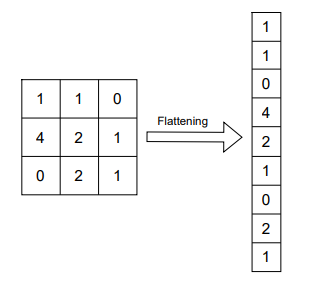

## Повне з'єднання.
На цьому кроі додається нова нейронна мережа. Завдання цієї мережі - обробка отриманиої інформації, об'єднати ознаки у атрибути, які дозволяють краще розпізнавати класи зображень.

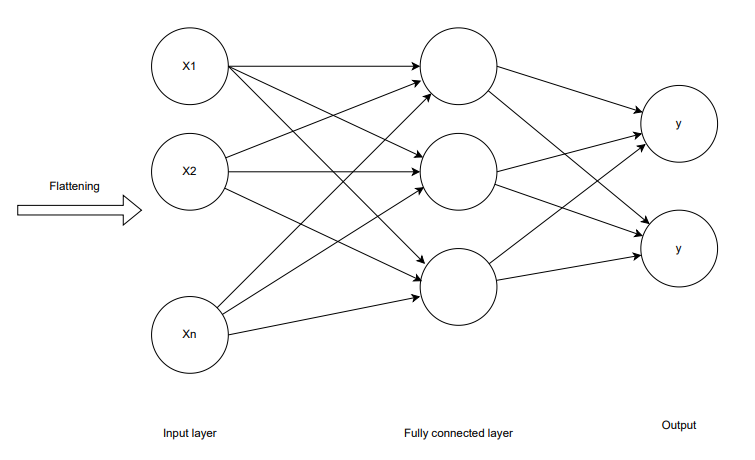

При проходженні через мережу і отриманні результатів, обраховується функція втрат (loss function). У згорткових нейронних мережах використовується так звана cross entropy функція. Задача мережі під час навчання - мінімізація функції втрат. Обраховане значення повертається у мережу, так само як і у ШНМ, після чого оновлюються значення ваг та детектори ознак.
Під час тренування результуючі нейрони визначають, які саме нейрони важливі для класифікації і так нейрони отримуют найбільші значення ваг при прийнятті рішення.

## Softmax & Cross-Entropy.
У загальному випадку нейрони вихідного шару повертають значення різного діапазону, які не обов'язково у сумі повертають 1. Тоді до них застосовується SoftMax функція, або нормалізація:
$f_j(x) = \frac{e^{x_{k}}}{\sum \limits _{k}{e^{x_{k}}}}$

Cross-entropy функція є однією з найкращих для обрахування помилки у завданнях класифікації. 